In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
YEARS = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

pipeCounts = eval(open('../data/pipe_counts.txt').read())

areas = [
    ('Arts and Sciences', 'A&S'),
    ('Humanities', 'HUM'),
    ('Natural Sciences', 'NS'),
    ('Social Sciences', 'SS'),
]

levels = [
    ('Undergraduate Major and Concentrator Students', 'UC'),
    ('Graduate Students', 'GS'),
    ('Tenure Eligible Faculty', 'TE'),
    ('Tenured Faculty', 'TF'),
]

def requestTable(area, level, years=YEARS):
    try:
        areaName = areas[area][0]
        levelName = levels[level][0]
    except (IndexOutOfBoundsError, TypeError) as e:
        print('Table could not be retrieved.')
        
    df = pd.DataFrame([YEARS] + pipeCounts[areaName][levelName])
    df = df.rename({0:'Year', 1: 'Women', 2: 'Men'}).T    
    if len(years) < len(YEARS): # we specified a few years only
        df = df.loc[df['Year'].isin(years)].reset_index()
    return df

In [157]:
def plotTable(plot, area, level, equality=True, abbreviate=True, years=YEARS):
    labelIndex = 1 if abbreviate else 0
    plot.set_title('{}: {}'.format(areas[area][labelIndex], levels[level][labelIndex]))
    
    table = requestTable(area, level, years=years)
    plot.plot(table['Men'], table['Women'], linestyle='--', marker='o', color='b')
    plot.set_xlabel('Number of Men')
    plot.set_ylabel('Number of Women')
    
    axMin = min(min(table['Women']), min(table['Men']))
    axMax = max(max(table['Women']), max(table['Men']))
    padding = int((axMax - axMin) * 0.1)
    axMin -= padding
    axMax += padding
    plot.axis(xmin=axMin,xmax=axMax,ymin=axMin,ymax=axMax)
    plot.grid(linestyle='dotted')
    
    if equality: # graph equality line
        plot.plot([axMin, axMax], [axMin, axMax], linestyle='--', marker='', color='#aaaaaa')

    for y in range(len(years)):
        plot.annotate(table['Year'][y], (table['Men'][y], table['Women'][y]))

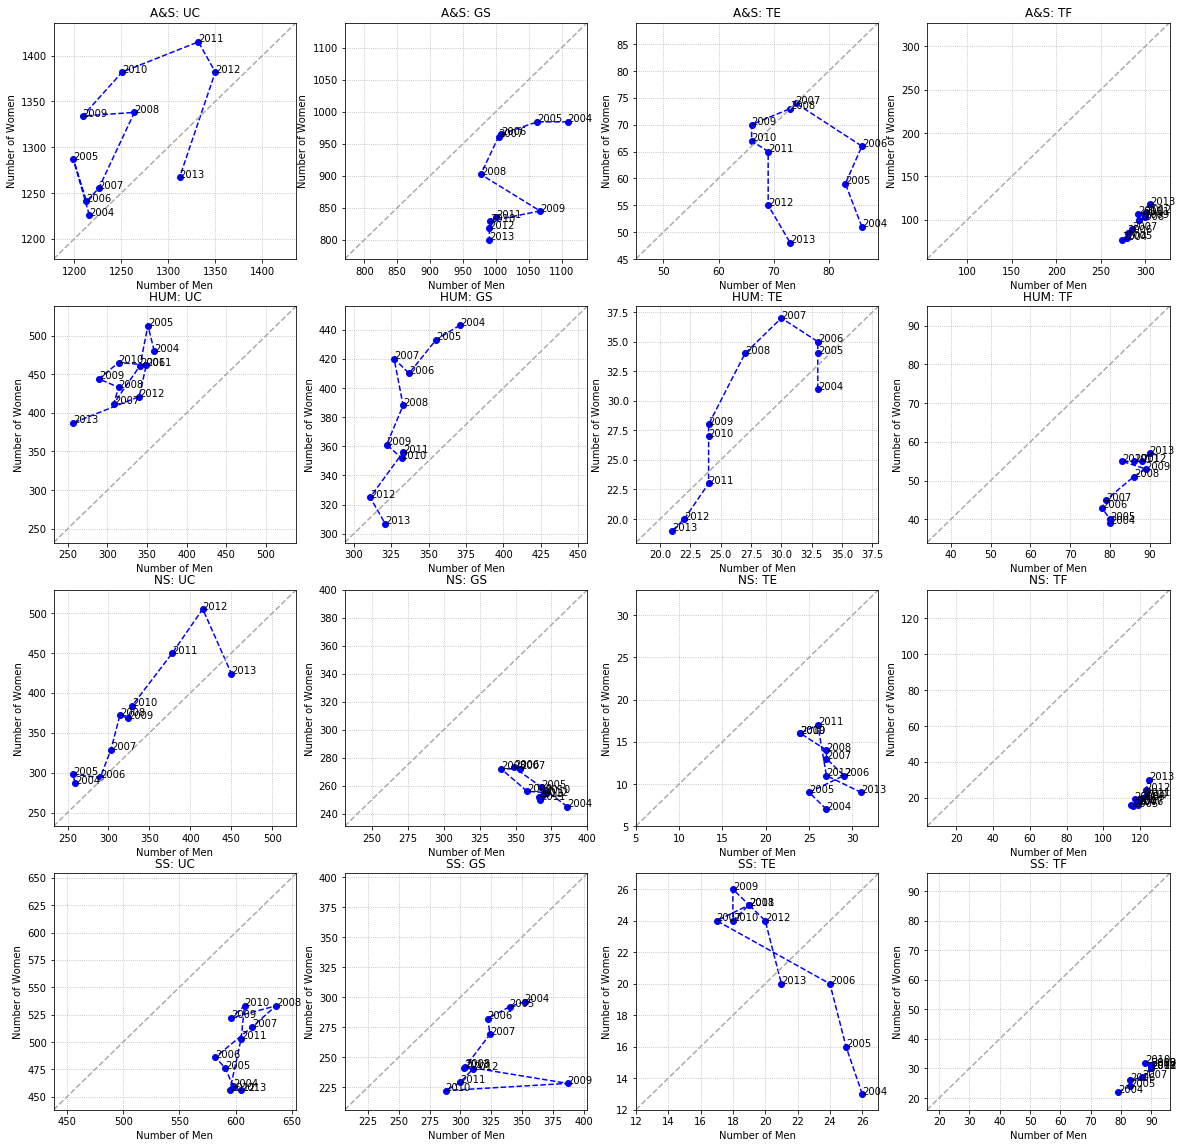

In [158]:
fig, ax_lst = plt.subplots(len(areas),len(levels), figsize=(20,20))

for i in range(len(areas)):
    for j in range(len(levels)):
        ax = ax_lst[i, j]
        plotTable(ax, i, j)

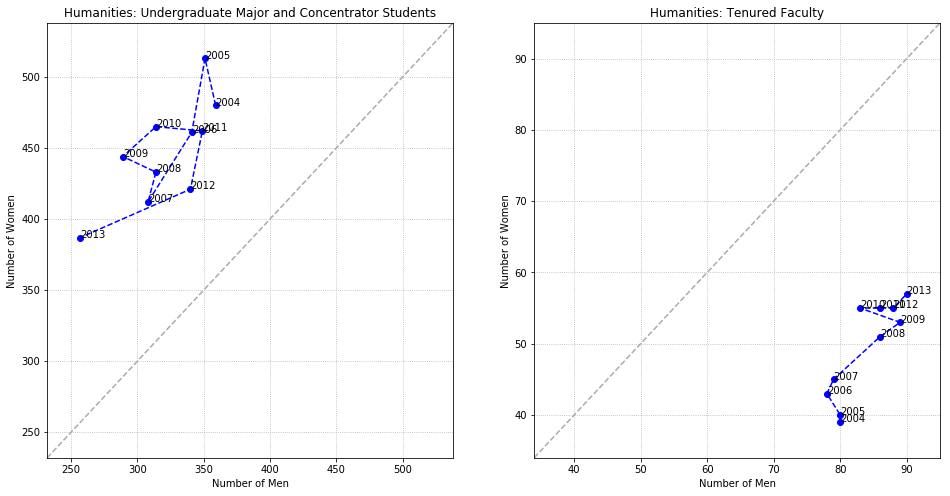

In [176]:
fig, ax_lst = plt.subplots(1, 2, figsize=(16,8))
plotTable(ax_lst[0], 1, 0, equality=True, abbreviate=False)
plotTable(ax_lst[1], 1, 3, equality=True, abbreviate=False)